# Dataset modeling 
## - Univariate and Bivariate 
## - Categorical and Continuous
## Summary:

The US Adult income dataset was downloaded from [Kaggle.com](https://www.kaggle.com/johnolafenwa/us-census-data). The actual data within the csv file was extracted by Barry Becker from the 1994 US Census Database. There are 32560 rows of data that relate income to social factors such as Age, Education, race, and gender. This notebook is 

Note that according to the [Bureau of Labor and Statistics](https://www.bls.gov/data/inflation_calculator.htm) , 50k USD in Dec, 1994 would be equivalent to 83,912.16 USD in Dec, 2018.

## Ensure the latest version of seaborn is loaded into notebook

In [1]:
!pip install seaborn --upgrade

    100% |████████████████████████████████| 215kB 23.7MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


## Imports

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Uploading CSV file, adding headers

In [2]:
# Import the csv file into a dataframe for analysis and manipulation

df = pd.read_csv('https://raw.githubusercontent.com/Vonganization/CSV_datasets/master/adult-training.csv', 
                 sep=",",
                 header=None,
                 names=['age','workclass','fnlwgt','education','education_num',
                        'marital_status',
                        'occupation',
                        'relationship',
                        'race',
                        'gender',
                        'capital_gain',
                        'capital_loss',
                        'hours_per_week',
                        'native_country',
                        'income_bracket'
                       ]
                )
df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Understanding the data
- Checking to see if null values will affect our goal
 - There are no null values seen
 - 32561 rows of data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
gender            32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income_bracket    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Selecting an outcome variable and four other varibles

Categorical:
- Gender
- Race

Continuous:
- Age (Ratio)
- Education_num (Ratio)
- Hours per week (Ratio)

## Exploring the data: Looking at the distribution

### First taking a count of each type for the Categoricals

#### Gender

In [4]:
df_gender_count = df['gender'].groupby(df['gender']).size().reset_index(name='g_count')
df_gender_count


,gender,g_count
0,Female,10771
1,Male,21790


#### Race

In [5]:
df_race_count = df['race'].groupby(df['race']).size().reset_index(name='r_count')
df_race_count

,race,r_count
0,Amer-Indian-Eskimo,311
1,Asian-Pac-Islander,1039
2,Black,3124
3,Other,271
4,White,27816


### Create plots to show the distributions

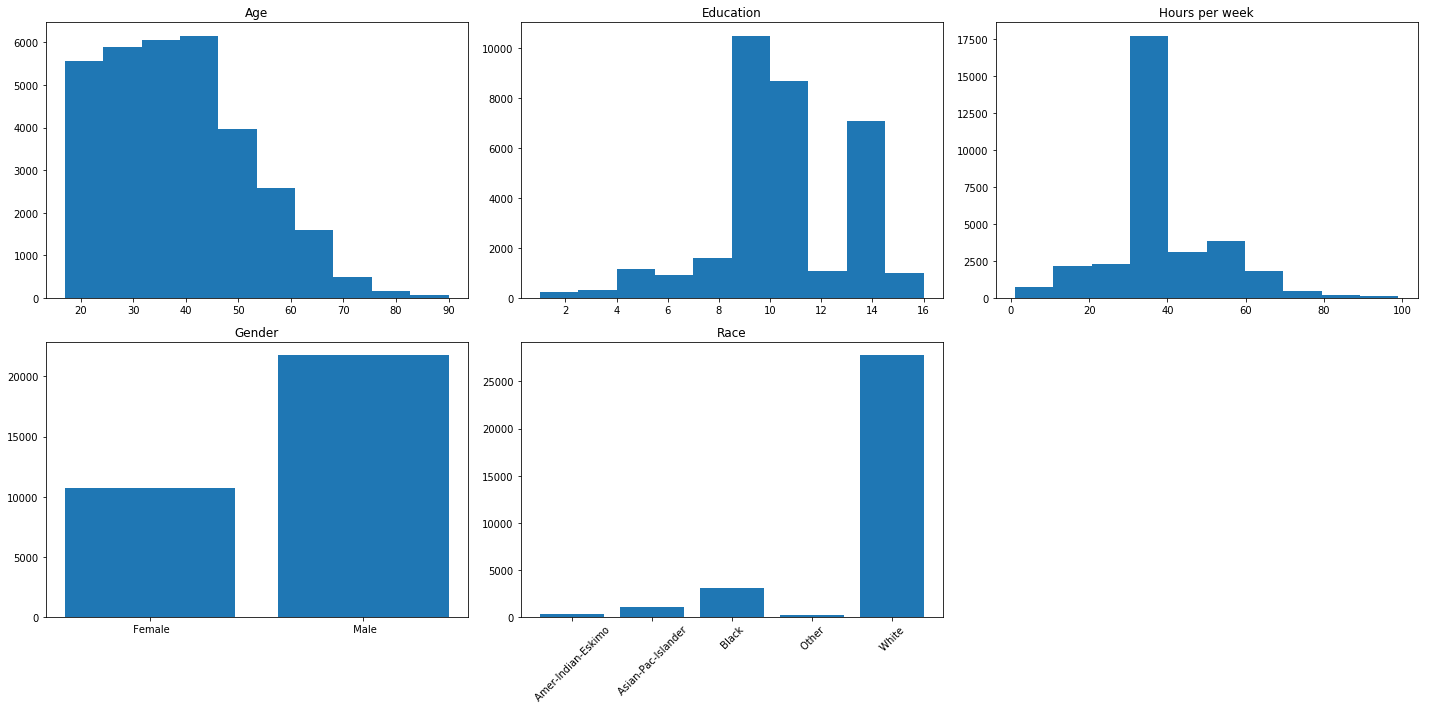

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()

ax0.set_title('Age')
ax0.hist(df['age'])

ax1.set_title('Education')
ax1.hist(df['education_num'])

ax2.set_title('Hours per week')
ax2.hist(df['hours_per_week'])

ax3.set_title('Gender')
ax3.bar(df_gender_count['gender'], df_gender_count['g_count'])

ax4.set_title('Race')
ax4.set_xticklabels(df_race_count['race'],rotation=45)
ax4.bar(df_race_count['race'], df_race_count['r_count'])

ax5.axis('off')

fig.tight_layout()
plt.show()

### Creating a dataframe to explore continuous bivariate data

In [16]:
df_bivariate_con = df[['age','education_num','hours_per_week', 'gender','income_bracket']]
df_bivariate_con.loc[df_bivariate_con['income_bracket'] == " <=50K", 'income_bracket'] = 0
df_bivariate_con.loc[df_bivariate_con['income_bracket'] == " >50K", 'income_bracket'] = 1
df_bivariate_con.head()


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,age,education_num,hours_per_week,gender,income_bracket
0,39,13,40,Male,0
1,50,13,13,Male,0
2,38,9,40,Male,0
3,53,7,40,Male,0
4,28,13,40,Female,0


### Generating a PairGrid graphing continuous variables against each other

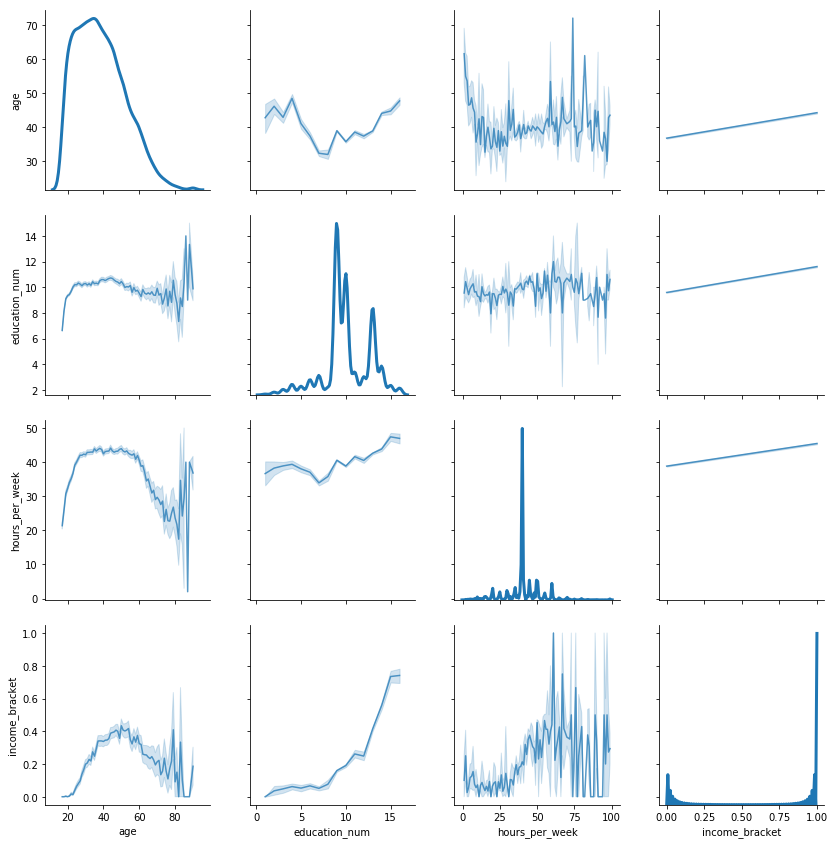

In [17]:
g = sns.PairGrid(df_bivariate_con, diag_sharey=False)
g.map_upper(sns.lineplot, alpha=.75)
g.map_lower(sns.lineplot, alpha=.75)
g.map_diag(sns.kdeplot, lw=3)
g.fig.set_size_inches(12,12)
plt.show()


### Creating a heatmap for correlation between each continuous variable

                     age  education_num  hours_per_week  income_bracket
age             1.000000       0.036527        0.068756        0.234037
education_num   0.036527       1.000000        0.148123        0.335154
hours_per_week  0.068756       0.148123        1.000000        0.229689
income_bracket  0.234037       0.335154        0.229689        1.000000


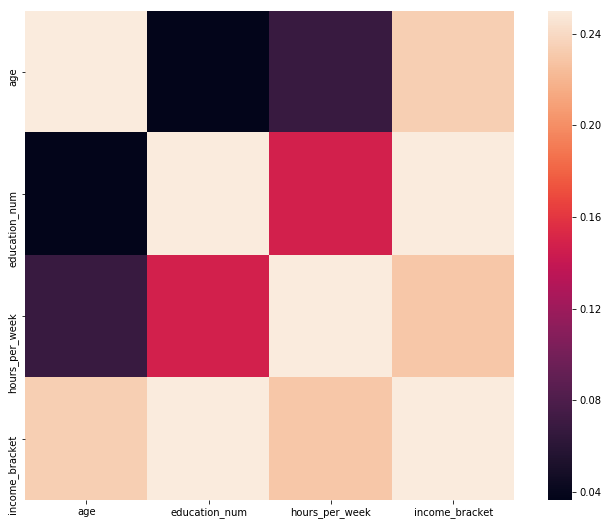

In [18]:
corrmat = df_bivariate_con.corr()
print(corrmat)

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.25, square=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


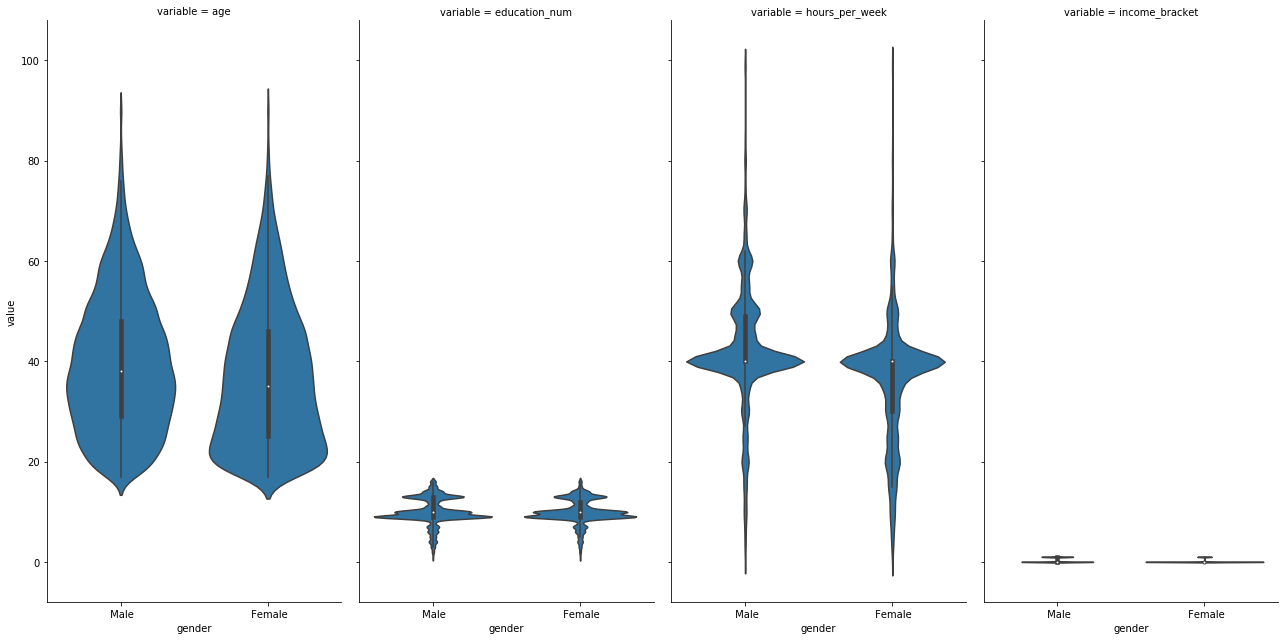

In [19]:
df_con_v_cat = df_bivariate_con
df_con_v_cat = pd.melt(df_con_v_cat, id_vars=['gender'])

g = sns.FacetGrid(df_con_v_cat, col="variable", size=9, aspect=.5)
g = g.map(sns.violinplot, "gender", "value")
plt.show()